### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Explainable AI. We will be using the Breast Cancer Dataset and here is a brief context about the same:

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.
A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

As part of the assignment, you will have to accomplish the below tasks.

**Author:** Ayoub Berdeddouch

###**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

# Task 1

## Import Necessary Libraries

In [2]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 15.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

import shap

shap.initjs()

## Load the data
Display the first 5 rows of the data after loading.

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv")
pd.set_option('display.max_columns', None)
data.head(5)

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    914102        13.16         20.54           84.06      538.7   
1     91858        11.75         17.56           75.89      422.9   
2  88466802        10.65         25.22           68.01      347.0   
3   9111843        12.00         28.23           76.77      442.5   
4  84862001        16.13         20.68          108.10      798.8   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.07335           0.05275         0.01800              0.01256   
1          0.10730           0.09713         0.05282              0.04440   
2          0.09657           0.07234         0.02379              0.01615   
3          0.08437           0.06450         0.04055              0.01945   
4          0.11700           0.20220         0.17220              0.10280   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.1713                 0.05888     0.3237       1.473         2.326   
1         0.1598                 0.06677     0.4384       1.907         3.149   
2         0.1897                 0.06329     0.2497       1.493         1.497   
3         0.1615                 0.06104     0.1912       1.705         1.516   
4         0.2164                 0.07356     0.5692       1.073         3.854   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0    26.07       0.007802         0.02052       0.01341           0.005564   
1    30.66       0.006587         0.01815       0.01737           0.013160   
2    16.64       0.007189         0.01035       0.01081           0.006245   
3    13.86       0.007334         0.02589       0.02941           0.009166   
4    54.18       0.007026         0.02501       0.03188           0.012970   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.02086              0.002701         14.50          28.46   
1      0.01835              0.002318         13.50          27.98   
2      0.02158              0.002619         12.25          35.19   
3      0.01745              0.004302         13.09          37.88   
4      0.01689              0.004142         20.96          31.48   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0            95.29       648.3            0.1118             0.1646   
1            88.52       552.3            0.1349             0.1854   
2            77.98       455.7            0.1499             0.1398   
3            85.07       523.7            0.1208             0.1856   
4           136.80      1315.0            0.1789             0.4233   

   concavity_worst  concave points_worst  symmetry_worst  \
0          0.07698               0.04195          0.2687   
1          0.13660               0.10100          0.2478   
2          0.11250               0.06136          0.3409   
3          0.18110               0.07116          0.2447   
4          0.47840               0.20730          0.3706   

   fractal_dimension_worst diagnosis  
0                  0.07429         B  
1                  0.07757         B  
2                  0.08147         B  
3                  0.08194         B  
4                  0.11420         M

## Perform Basic Exploratory Data Analysis (EDA)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.

In [8]:
data.corr()
#.corr() is used to find the pairwise correlation of all columns

id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.053013      0.064714        0.053310   
radius_mean              0.053013     1.000000      0.370559        0.997984   
texture_mean             0.064714     0.370559      1.000000        0.377602   
perimeter_mean           0.053310     0.997984      0.377602        1.000000   
area_mean                0.085935     0.986661      0.371092        0.986029   
smoothness_mean         -0.045771     0.181021      0.009188        0.215509   
compactness_mean        -0.012110     0.531935      0.283013        0.580307   
concavity_mean           0.053062     0.684128      0.343909        0.720764   
concave points_mean      0.034495     0.833289      0.347076        0.859523   
symmetry_mean           -0.078422     0.110827      0.074819        0.145323   
fractal_dimension_mean  -0.042292    -0.331993     -0.071212       -0.284797   
radius_se                0.125892     0.684046      0.317878        0.696138   
texture_se              -0.010739    -0.087534      0.427460       -0.074023   
perimeter_se             0.113964     0.679227      0.321211        0.697652   
area_se                  0.176118     0.729117      0.298161        0.737701   
smoothness_se            0.123051    -0.227814      0.038002       -0.210177   
compactness_se           0.054527     0.233671      0.206999        0.275380   
concavity_se             0.067379     0.173923      0.137678        0.204652   
concave points_se        0.057801     0.374878      0.186839        0.403991   
symmetry_se             -0.064726    -0.105575     -0.012439       -0.082423   
fractal_dimension_se     0.057716    -0.041696      0.073012       -0.009638   
radius_worst             0.060637     0.969835      0.402402        0.969895   
texture_worst            0.041220     0.329921      0.909448        0.337438   
perimeter_worst          0.056923     0.964768      0.410636        0.969863   
area_worst               0.098540     0.939238      0.400265        0.939864   
smoothness_worst        -0.007036     0.140573      0.131954        0.168529   
compactness_worst       -0.009724     0.466587      0.306401        0.505573   
concavity_worst          0.024639     0.541233      0.329708        0.575270   
concave points_worst     0.020508     0.754886      0.333799        0.779149   
symmetry_worst          -0.093087     0.148066      0.095071        0.172585   
fractal_dimension_worst -0.023410     0.014259      0.135850        0.055418   

                         area_mean  smoothness_mean  compactness_mean  \
id                        0.085935        -0.045771         -0.012110   
radius_mean               0.986661         0.181021          0.531935   
texture_mean              0.371092         0.009188          0.283013   
perimeter_mean            0.986029         0.215509          0.580307   
area_mean                 1.000000         0.185633          0.524159   
smoothness_mean           0.185633         1.000000          0.633941   
compactness_mean          0.524159         0.633941          1.000000   
concavity_mean            0.696779         0.507177          0.877536   
concave points_mean       0.834096         0.536495          0.832109   
symmetry_mean             0.115726         0.532225          0.581543   
fractal_dimension_mean   -0.303085         0.546585          0.515431   
radius_se                 0.746399         0.267633          0.500400   
texture_se               -0.058272         0.122879          0.097833   
perimeter_se              0.740162         0.269499          0.555467   
area_se                   0.802528         0.226801          0.454123   
smoothness_se            -0.169248         0.284216          0.108126   
compactness_se            0.243725         0.278271          0.724252   
concavity_se              0.191596         0.231168          0.542006   
concave points_se         0.374022         0.339563          0.630444   
symmetry_s

In [9]:
data = data.drop(['id', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'concave points_worst', 'area_worst',\
           'perimeter_worst', 'radius_worst', 'radius_se', 'area_se', 'perimeter_se', 'smoothness_worst', 'compactness_mean',\
           'texture_worst', 'fractal_dimension_se', 'symmetry_worst', 'concavity_worst', 'fractal_dimension_worst',\
           'concave points_se', 'compactness_se'], axis=1)
#drop() method removes the specified row or column. 

In [10]:
data['diagnosis'].value_counts()


B    250
M    148
Name: diagnosis, dtype: int64

In [11]:
y = data['diagnosis'].astype('category').cat.codes
y.head()

0    0
1    0
2    0
3    0
4    1
dtype: int8

In [12]:
X = data.iloc[:, :-1]
X.head()

radius_mean  texture_mean  smoothness_mean  symmetry_mean  \
0        13.16         20.54          0.07335         0.1713   
1        11.75         17.56          0.10730         0.1598   
2        10.65         25.22          0.09657         0.1897   
3        12.00         28.23          0.08437         0.1615   
4        16.13         20.68          0.11700         0.2164   

   fractal_dimension_mean  texture_se  smoothness_se  concavity_se  \
0                 0.05888       1.473       0.007802       0.01341   
1                 0.06677       1.907       0.006587       0.01737   
2                 0.06329       1.493       0.007189       0.01081   
3                 0.06104       1.705       0.007334       0.02941   
4                 0.07356       1.073       0.007026       0.03188   

   symmetry_se  compactness_worst  
0      0.02086             0.1646  
1      0.01835             0.1854  
2      0.02158             0.1398  
3      0.01745             0.1856  
4      0.01689             0.4233

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
X_train.head()

(318, 10) (80, 10)


radius_mean  texture_mean  smoothness_mean  symmetry_mean  \
64         11.62         18.18          0.11750         0.1957   
55         19.55         28.77          0.09260         0.1893   
317        13.14         20.74          0.08675         0.1562   
102        16.78         18.80          0.08865         0.1893   
358        19.53         32.47          0.08420         0.1428   

     fractal_dimension_mean  texture_se  smoothness_se  concavity_se  \
64                  0.07255      1.7400       0.014590       0.04961   
55                  0.06232      1.1990       0.006356       0.03863   
317                 0.06020      0.7884       0.007295       0.04615   
102                 0.05534      1.3910       0.006123       0.02626   
358                 0.05313      1.3210       0.005539       0.02664   

     symmetry_se  compactness_worst  
64       0.01807             0.2878  
55       0.01936             0.5329  
317      0.01561             0.3549  
102      0.02091             0.2119  
358      0.01332             0.4097

# Task 2

## Use Random Forest Machine Learning Model for prediction

In [15]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 250)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

## Evaluate the model using Accuracy Score

In [16]:
pred = rfc.predict(X_test)
pred[:15], f1_score(pred, y_test)

(array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int8),
 0.9014084507042254)

# Task 3: Explaining the model with SHAP and Lime.

##  Use a SHAP Explainer to derive SHAP Values for the random forest ml model.

In [17]:
explainer = shap.TreeExplainer(rfc)

shap_values = explainer.shap_values(X_test)[0]

print('Expected Value:', explainer.expected_value[0])

pd.DataFrame(shap_values, columns = X_train.columns).head()

Expected Value: 0.6550817610062896


radius_mean  texture_mean  smoothness_mean  symmetry_mean  \
0     0.061435     -0.093581        -0.019340      -0.005165   
1     0.169922      0.038466        -0.016170       0.008956   
2     0.176597     -0.010930        -0.005951       0.014998   
3     0.132136      0.061781         0.030180       0.009673   
4     0.125716      0.045376         0.035118       0.002407   

   fractal_dimension_mean  texture_se  smoothness_se  concavity_se  \
0                0.013074    0.001284      -0.006992     -0.053269   
1                0.018582   -0.008522      -0.001544      0.040489   
2               -0.007542    0.003291      -0.000359      0.004514   
3                0.005744    0.002524       0.000157      0.034388   
4               -0.001782    0.012223       0.007610      0.043742   

   symmetry_se  compactness_worst  
0     0.007296          -0.287825  
1     0.002007           0.080733  
2    -0.007075           0.081373  
3    -0.006376           0.066711  
4     0.005701           0.052807

In [18]:
np.round(shap_values.mean(axis=0),3)


array([-0.034,  0.001, -0.004, -0.001, -0.002, -0.001, -0.001, -0.   ,
        0.001, -0.015])

## Write your inferences from the generated plot.

As we can see, the baseline number is 0.654, and anything below that is considered benign.



# Task 4

## Plot a SHAP force plot for the first row of test data.

In [19]:
print(X_test.iloc[0,:])
print(f"The output is {y_test.iloc[0]}: {'M' if y_test.iloc[0] else 'B'}")

radius_mean               14.250000
texture_mean              21.720000
smoothness_mean            0.098230
symmetry_mean              0.188500
fractal_dimension_mean     0.061250
texture_se                 1.019000
smoothness_se              0.005878
concavity_se               0.048150
symmetry_se                0.020280
compactness_worst          0.423800
Name: 65, dtype: float64
The output is 1: M


In [20]:

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0,:], X_test.iloc[0,:])

## Write your inferences from the generated plot.

We believe that because the final value (0.28) is less than the expected value (0.654), the data is malignant.



# Task 5

## Plot a SHAP force plot for all the rows of the data

In [21]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values, X_test)
     

## Write your inferences from the generated plot.

The worst compactness is at least 0.1mm or the texture mean is at least 19mm for the first 26 samples, and the mean radius is at least 15mm. These samples are expected to be harmless.

The mean radius, mean texture, and worst compactness are typically below 15mm, below 16mm, and below 0.2mm for the remaining 39 data points.

Conclusion: Benign breast cancer has higher mean radius and texture, whereas malignant breast cancer has lower mean radius and texture.

# Task 6

## Plot a SHAP summary plot using all the features in the data

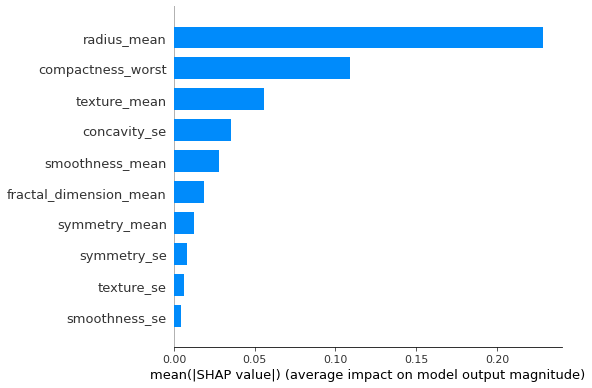

In [22]:
shap.initjs()
shap.summary_plot(shap_values, X_test, plot_type="bar")

## Write your inferences from the generated plot.

The most significant variable, according to our observations, is radius mean, while texture se and smoothness se are the least significant variables.



# Task 7

##Plot a SHAP dependecne plot using all features in the data

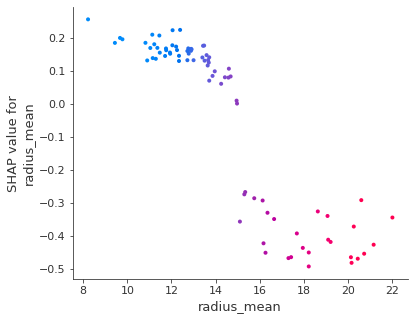

In [23]:

shap.initjs()
shap.dependence_plot(ind='radius_mean', interaction_index='radius_mean', shap_values=shap_values, features=X_test)

## Write your inferences from the generated plot.

The model's predictions tend to favor classifying the malignancy as benign when the mean radius is lower.



# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

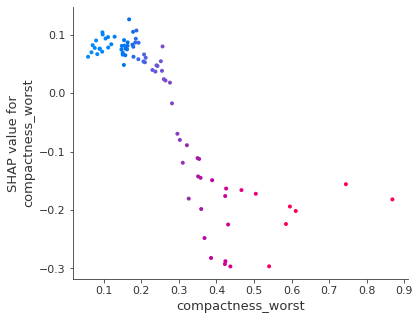

In [24]:

shap.initjs()
shap.dependence_plot(ind='compactness_worst', interaction_index='compactness_worst', shap_values=shap_values, features=X_test)

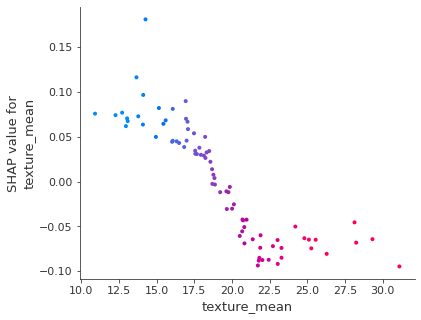

In [25]:
shap.initjs()
shap.dependence_plot(ind='texture_mean', interaction_index='texture_mean', shap_values=shap_values, features=X_test)

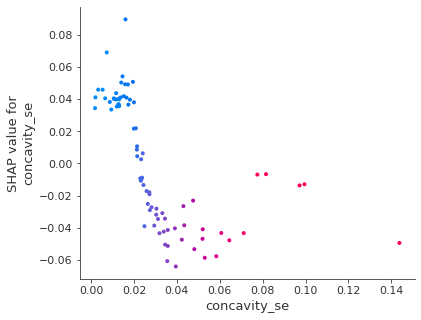

In [26]:
shap.initjs()
shap.dependence_plot(ind='concavity_se', interaction_index='concavity_se', shap_values=shap_values, features=X_test)

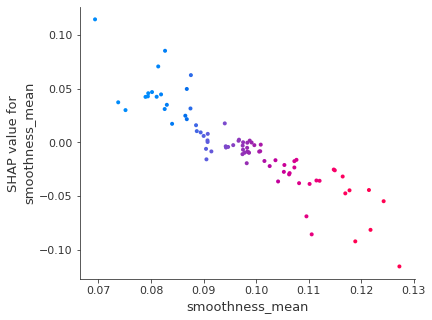

In [35]:
shap.initjs()
shap.dependence_plot(ind='smoothness_mean', interaction_index='smoothness_mean', shap_values=shap_values, features=X_test)

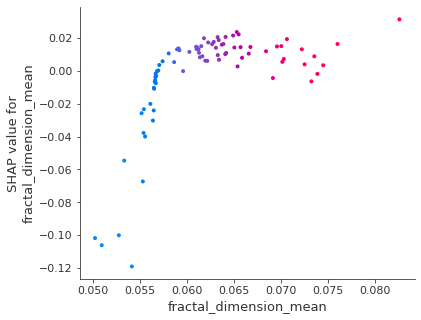

In [28]:
shap.initjs()
shap.dependence_plot(ind='fractal_dimension_mean', interaction_index='fractal_dimension_mean', shap_values=shap_values, features=X_test)

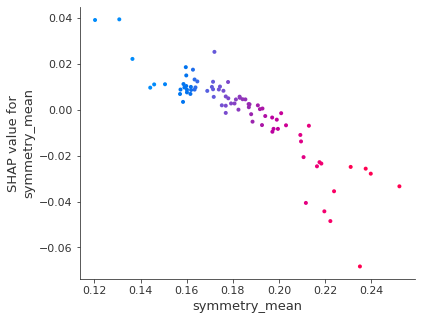

In [29]:
shap.initjs()
shap.dependence_plot(ind='symmetry_mean', interaction_index='symmetry_mean', shap_values=shap_values, features=X_test)

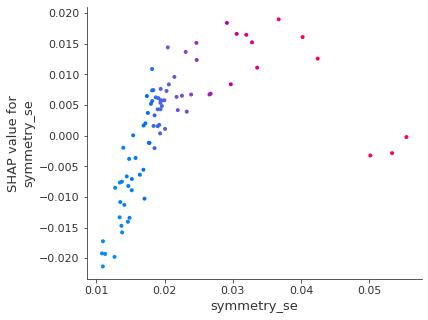

In [30]:
shap.initjs()
shap.dependence_plot(ind='symmetry_se', interaction_index='symmetry_se', shap_values=shap_values, features=X_test)

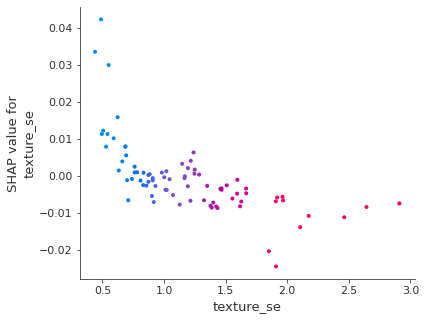

In [31]:
shap.initjs()
shap.dependence_plot(ind='texture_se', interaction_index='texture_se', shap_values=shap_values, features=X_test)

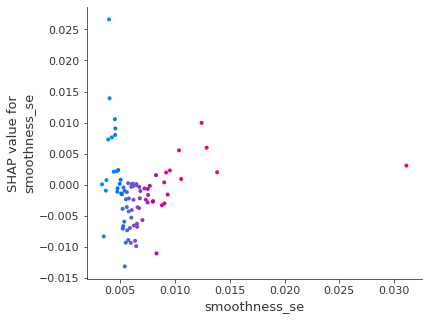

In [32]:
shap.initjs()
shap.dependence_plot(ind='smoothness_se', interaction_index='smoothness_se', shap_values=shap_values, features=X_test)